In [12]:
pip install mplcursors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=826a8132a1671e181a0425847fd03d954b83108e522f5f45e019d292b7a021bd
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


Enter the stock ticker: tsla


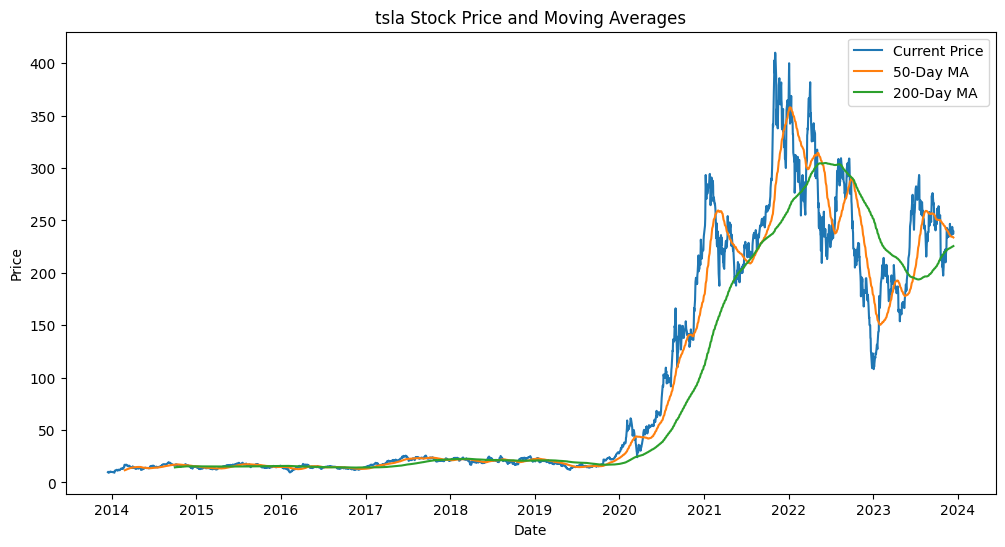

Current Price: $239.29 USD
Current 50 Day Moving Average: $233.73 USD
Current 200 Day Moving Average: $225.51 USD
The current price is overvalued, you should probably wait a little longer.


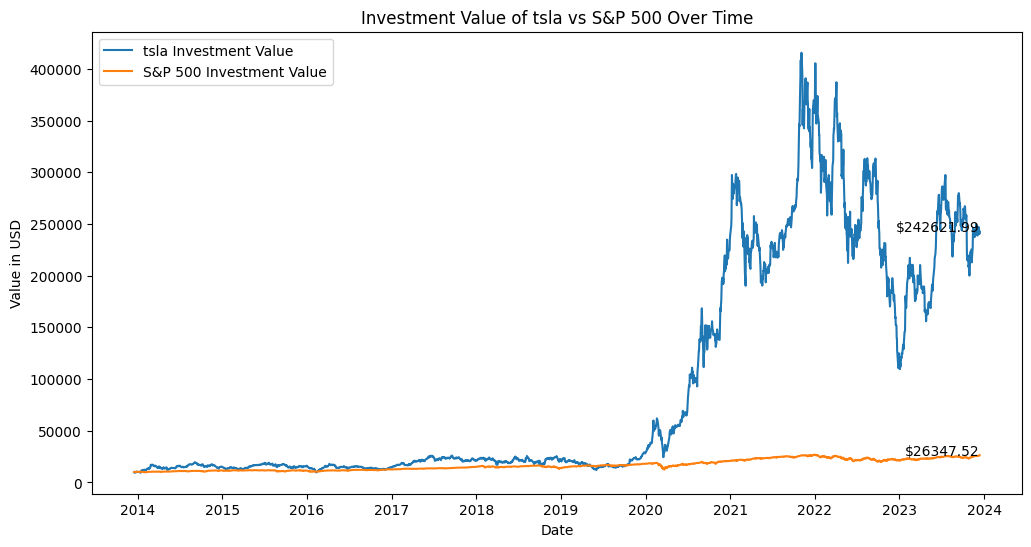

If invested $10,000 in tsla 10 years ago, today's value would be: $242621.99 USD
If you invested $10,000 in S&P 500 10 years ago, today's value would be: $26347.52 USD


In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

# Fetching stock data from Yahoo Finance for the past 10 years
def fetch_stock_data(ticker):
    try:
        data = yf.download(ticker, period='10y', progress=False)
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Calculating 50-day and 200-day moving averages of the stock
def calculate_moving_averages(data):
    data['50_MA'] = data['Close'].rolling(window=50).mean()
    data['200_MA'] = data['Close'].rolling(window=200).mean()
    return data

# Evaluating stock valuation against its moving averages
def evaluate_stock_valuation(data):
    current_price = data['Close'].iloc[-1]
    current_50_MA = data['50_MA'].iloc[-1]
    current_200_MA = data['200_MA'].iloc[-1]
    # Displaying current price and moving averages
    print(f"Current Price: ${current_price:.2f} USD")
    print(f"Current 50 Day Moving Average: ${current_50_MA:.2f} USD")
    print(f"Current 200 Day Moving Average: ${current_200_MA:.2f} USD")

    # Providing buying or waiting advice based on stock valuation
    if current_price < current_50_MA and current_price < current_200_MA:
        print("The current price is undervalued, it might be a good option to buy.")
    elif current_50_MA < current_price < current_200_MA:
        print("The current price is evenly valued.")
    else:
        print("The current price is overvalued, you should probably wait a little longer.")

# Plotting stock prices and moving averages for visualization
def plot_data(ticker, data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Current Price')
    plt.plot(data['50_MA'], label='50-Day MA')
    plt.plot(data['200_MA'], label='200-Day MA')
    plt.title(f"{ticker} Stock Price and Moving Averages")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Function to calculate the value of investment over time
def calculate_investment_value(data, initial_investment):
    initial_price = data['Close'].iloc[0]
    shares = initial_investment / initial_price
    data['Investment_Value'] = shares * data['Close']
    return data

# Plotting stock investment values with annotations
def plot_investment_values(ticker, ticker_data, snp_data):
    # Calculate current investment values
    current_value_ticker = ticker_data['Investment_Value'].iloc[-1]
    current_value_snp = snp_data['Investment_Value'].iloc[-1]

    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Investment_Value'], label=f'{ticker} Investment Value')
    plt.plot(snp_data['Investment_Value'], label='S&P 500 Investment Value')
    plt.title(f"Investment Value of {ticker} vs S&P 500 Over Time")
    plt.xlabel('Date')
    plt.ylabel('Value in USD')
    plt.legend()

    # Annotating the current values on the plot
    plt.text(ticker_data.index[-1], current_value_ticker, f'${current_value_ticker:.2f}', ha='right')
    plt.text(snp_data.index[-1], current_value_snp, f'${current_value_snp:.2f}', ha='right')

    plt.show()

    # Printing the current investment values
    print(f"If invested $10,000 in {ticker} 10 years ago, today's value would be: ${current_value_ticker:.2f} USD")
    print(f"If you invested $10,000 in S&P 500 10 years ago, today's value would be: ${current_value_snp:.2f} USD")



# Modified main function
def main(ticker):
    stock_data = fetch_stock_data(ticker)
    snp_data = fetch_stock_data('^GSPC')

    if stock_data is not None and snp_data is not None:
        stock_data = calculate_moving_averages(stock_data)
        plot_data(ticker, stock_data)
        evaluate_stock_valuation(stock_data)

        stock_data = calculate_investment_value(stock_data, 10000)
        snp_data = calculate_investment_value(snp_data, 10000)
        plot_investment_values(ticker, stock_data, snp_data)
    else:
        print("Could not retrieve stock data.")

if __name__ == "__main__":
    ticker = input("Enter the stock ticker: ")
    main(ticker)
